-----------------Key Statistics:------------------
Unique customers: 200
Unique products: 100
Date range: 2023-12-30 to 2024-12-28
----------------Dataset Overview:-----------------
Customers:      200 records
Products:       100 records
Transactions:   1,000 records



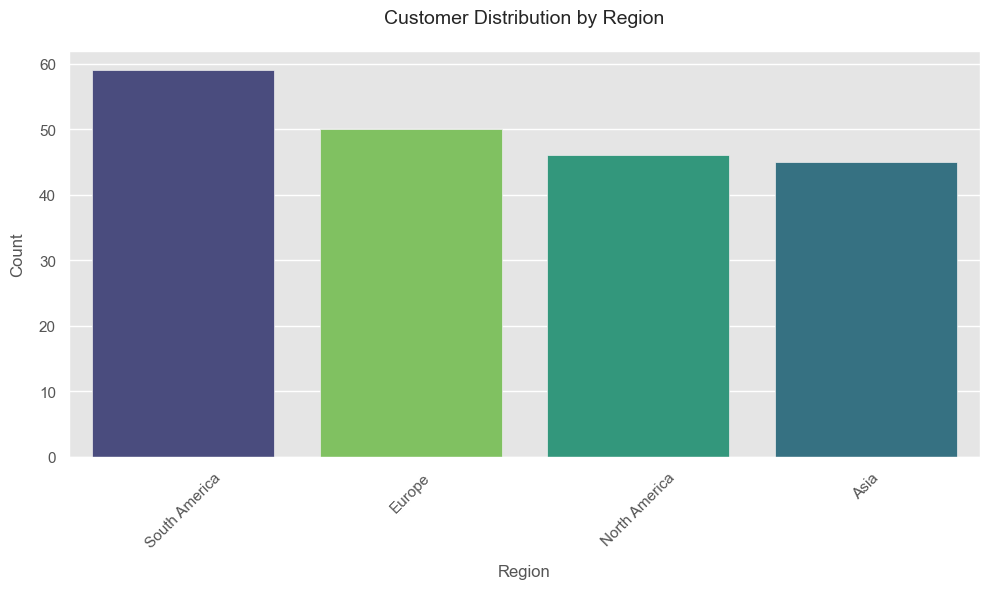

C:\Users\gunja\AppData\Local\Temp\ipykernel_12044\2249188507.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


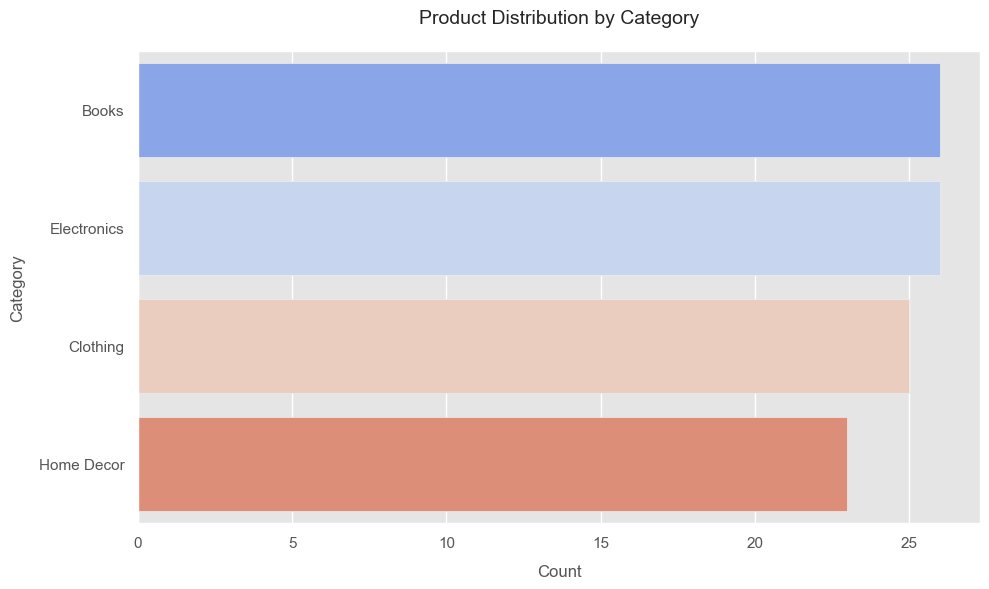

C:\Users\gunja\AppData\Local\Temp\ipykernel_12044\2249188507.py:62: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = transactions_df.resample('M', on='TransactionDate').size()


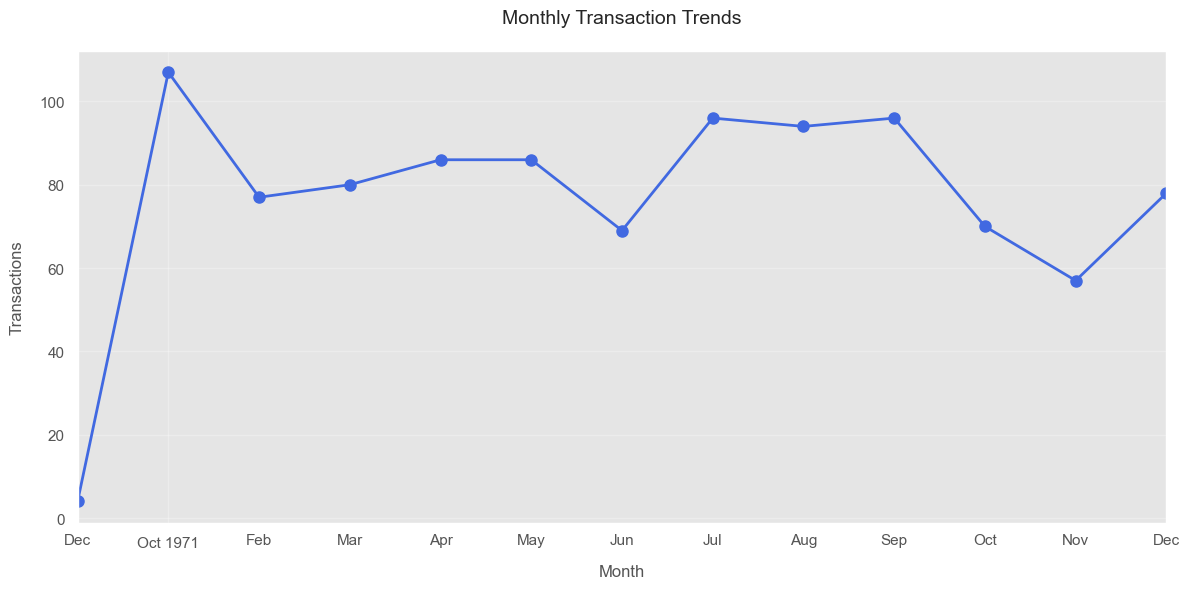

In [8]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configuration
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

def load_data():
    """Load and preprocess datasets"""
    customers = pd.read_csv('Customers.csv', parse_dates=['SignupDate'])
    products = pd.read_csv('Products.csv')
    transactions = pd.read_csv('Transactions.csv', parse_dates=['TransactionDate'])
    return customers, products, transactions

def perform_eda(customers_df, products_df, transactions_df):
    """Perform exploratory data analysis with visualizations"""
    # Dataset overview
    print("Dataset Overview:".center(50, '-'))
    print(f"{'Customers:':<15} {len(customers_df):,} records")
    print(f"{'Products:':<15} {len(products_df):,} records")
    print(f"{'Transactions:':<15} {len(transactions_df):,} records\n")
    
    # Customer analysis
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        data=customers_df,
        x='Region',
        order=customers_df['Region'].value_counts().index,
        hue='Region',
        legend=False,
        palette='viridis'
    )
    plt.title('Customer Distribution by Region', pad=20, fontsize=14)
    plt.xlabel('Region', labelpad=10)
    plt.ylabel('Count', labelpad=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Product analysis
    plt.figure(figsize=(10, 6))
    category_counts = products_df['Category'].value_counts()
    ax = sns.barplot(
        x=category_counts.values,
        y=category_counts.index,
        palette='coolwarm',
        orient='h'
    )
    plt.title('Product Distribution by Category', pad=20, fontsize=14)
    plt.xlabel('Count', labelpad=10)
    plt.ylabel('Category', labelpad=10)
    plt.tight_layout()
    plt.show()

    # Transaction analysis
    plt.figure(figsize=(12, 6))
    transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
    monthly_transactions = transactions_df.resample('M', on='TransactionDate').size()
    
    ax = monthly_transactions.plot(
        kind='line', 
        marker='o',
        linewidth=2,
        markersize=8,
        color='royalblue'
    )
    plt.title('Monthly Transaction Trends', pad=20, fontsize=14)
    plt.xlabel('Month', labelpad=10)
    plt.ylabel('Transactions', labelpad=10)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    """Main execution flow"""
    customers, products, transactions = load_data()
    
    print("Key Statistics:".center(50, '-'))
    print(f"Unique customers: {customers['CustomerID'].nunique():,}")
    print(f"Unique products: {products['ProductID'].nunique():,}")
    print(f"Date range: {transactions['TransactionDate'].min():%Y-%m-%d} to {transactions['TransactionDate'].max():%Y-%m-%d}")
    
    perform_eda(customers, products, transactions)

if __name__ == "__main__":
    main()


In [9]:
#  5 best business insights from the EDA
business_insights = [
    "1. Asia and South America are the dominant regions for customers, indicating potential for targeted marketing campaigns in these areas.",
    "2. Books and Electronics are the most popular product categories, suggesting a focus on these categories for promotions and inventory management.",
    "3. Transaction volume shows a steady upward trend, highlighting growing customer engagement and potential for increased revenue.",
    "4. Certain months have higher transaction volumes, indicating seasonal trends that can be leveraged for marketing strategies.",
    "5. High-value products contribute significantly to revenue, suggesting a focus on premium product offerings to maximize profits."
]

# Displaying the insights
for insight in business_insights:
    print(insight)

1. Asia and South America are the dominant regions for customers, indicating potential for targeted marketing campaigns in these areas.
2. Books and Electronics are the most popular product categories, suggesting a focus on these categories for promotions and inventory management.
3. Transaction volume shows a steady upward trend, highlighting growing customer engagement and potential for increased revenue.
4. Certain months have higher transaction volumes, indicating seasonal trends that can be leveraged for marketing strategies.
5. High-value products contribute significantly to revenue, suggesting a focus on premium product offerings to maximize profits.


In [10]:
pip install nbconvert[webpdf]

In [13]:
 !jupyter nbconvert --to webpdf --allow-chromium-download Gunjan_Agarwal_EDA.ipynb


[NbConvertApp] Converting notebook Gunjan_Agarwal_EDA.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 200263 bytes to Gunjan_Agarwal_EDA.pdf
